In [10]:
%pwd
%cd /home/arno/Projects/EEGDecodingTest/My

/home/arno/Projects/EEGDecodingTest/My


/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [11]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
import os
import pickle
from tqdm import tqdm

In [12]:
model_name ='/home/arno/Projects/EEGDecodingTest/My/LLM/Qwen2.5-7B-Instruct'
device="cuda"
    
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
).to(device)
tokenizer = AutoTokenizer.from_pretrained(model_name)


def getEmbedding(text, raw=False):
        if not raw:
                messages = [
                        # {"role": "system", "content": ' You are a helpful assistant. The user has a language impairment, and their expressions may contain a lot of noise. You need to rephrase their meaning clearly.'},
                        {"role": "system", "content": ' You are a helpful assistant.'},
                        {"role": "user", "content": text}
                        ]
                text = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

        model_inputs = tokenizer([text], return_tensors="pt").to(device)
        return model.get_input_embeddings()(model_inputs.input_ids)



Loading checkpoint shards: 100%|██████████| 4/4 [00:05<00:00,  1.29s/it]


In [10]:
e1=getEmbedding("love",raw=True) #torch.Size([1, 1, 3584])
e2=getEmbedding("9900\nlove",raw=True) #torch.Size([1, 6, 3584])

e2[0,-1,:]-e1[0,:,:]

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SubBackward0>)

In [100]:
concatenated_string ="".join([ch[0] for ch in characters[:1000]])

/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26159 (\N{CJK UNIFIED IDEOGRAPH-662F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/arno/conda/envs/MNE-EEG/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarni

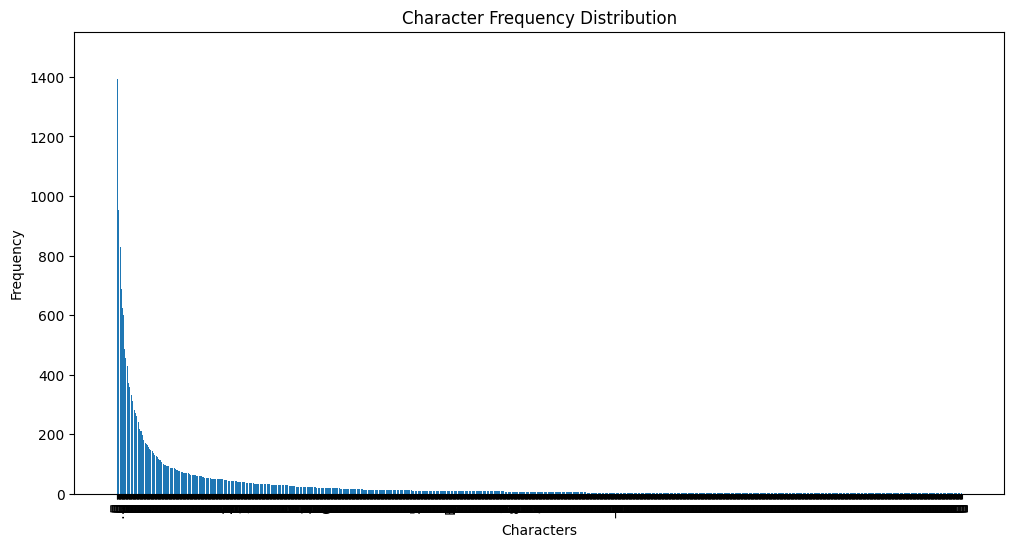

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# Extract characters
character_list = [ch[0] for ch in characters]

# Count frequencies
frequency_counts = Counter(character_list)

# Sort by frequency
sorted_counts = frequency_counts.most_common()

# Separate keys and values for plotting
keys, values = zip(*sorted_counts)

# Plot the frequencies
plt.figure(figsize=(12, 6))
plt.bar(keys, values)
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.title('Character Frequency Distribution')
plt.xticks(rotation=90)
plt.show()

In [33]:
concatenated_string

'9我想他是趁一群野鸟迁徙的机会出走的动身的那天早晨他把星球收拾得井井有条他仔细地疏通了活火山星球上有两座活火山热早餐很方便还有一座死火山不过正像他所说的谁说得准呢！所以这座死火山也照样要疏通火山疏通过了就会缓缓地均匀地燃烧不会喷发火山喷发跟烟囱冒火是一样的当然在地球上我们实在太小了没法去疏通火山它们造成那么多麻烦就是由于这个缘故小王子还拔掉了刚长出来的几株猴面包树幼苗他心情有点忧郁心想这一走就再也回不来了所有这些习惯的活儿这天早上都显得格外亲切而当他最后一次给花儿浇水准备给它盖上罩子的时候他只觉得想哭再见啦他对花儿说可是她没有回答再见啦他又说了一遍花儿咳嗽起来但不是由于感冒我以前太傻了她终于开口了请你原谅我但愿你能幸福他感到吃惊的是居然没有一声责备他举着罩子茫然不知所措地站在那儿他不懂这般恬淡的柔情是的我爱你花儿对他说但由于我的过错你一点儿也没领会这没什么要紧不过你也和我一样傻但愿你能幸福……把这罩子放在一边吧我用不着它了可是风……我并不是那么容易感冒的……夜晚的新鲜空气对我有好处我是一朵花儿可是那些虫子和野兽……我既然想认识蝴蝶就应该受得了两三条毛虫我觉得这样挺好要不然有谁来看我呢你你到时候已经走得远远的了至于野兽我根本不怕我也有爪子说着她天真地让他看那四根刺随后她又说别磨磨蹭蹭的让人心烦你已经决定要走了那就走吧因为她不愿意让他看见自己流泪她是一朵如此骄傲的花儿……10这颗星球附近还有325号326号327号328号329号和330号小行星于是他开始拜访这些星球好给自己找点事干也好增长些见识第一颗小行星上住着一个国王这个国王身穿紫红镶边白鼬皮长袍端坐在一张简朴而又气派庄严的王座上哈！来了一个臣民国王看见小王子大声叫了起来可小王子觉得纳闷他以前从没见过我怎么会认识我呢他不知道对国王来说世界是非常简单的所有的人都是臣民你走近点让我好好看看你国王说他觉得非常骄傲因为他终于成了某个人的国王小王子朝四下里看看想找个地方坐下来可是整个星球都被那袭华丽的白鼬皮长袍占满了所以他只好站着不过由于他累了就打了个哈欠在国王面前打哈欠有违宫廷礼仪国王对他说我禁止你打哈欠我没忍住小王子歉疚地说我走了好长的路一直没睡觉……那么国王对他说我命令你打哈欠我有好几年没见人打哈欠了我觉得打哈欠挺好玩来！再打个哈欠这是命令我给吓着了……打不出……小王子涨红着脸说呣！呣！国王回答说那么我……我命令你一

In [22]:

substring_index = concatenated_string.find("国王看见小王子大声叫了起来")
substring_index

710

In [25]:
concatenated_string[710:723]

'国王看见小王子大声叫了起来'

In [66]:
def euclidean_distance(tensor1, tensor2):
    """
    计算两个张量之间的欧几里得距离。
    
    参数:
    - tensor1 (torch.Tensor): 第一个张量，形状为 (..., D)，其中 D 是特征维度。
    - tensor2 (torch.Tensor): 第二个张量，形状为 (..., D)。
    
    返回:
    - distance (torch.Tensor): 欧几里得距离，形状为 (...,)。
    """
    # 确保两个张量在相同设备上
    # tensor1 = tensor1.to(tensor2.device)
    if type(tensor1)!=torch.Tensor:
        tensor1=torch.tensor(tensor1)
        tensor2=torch.tensor(tensor2)
    
    # 计算平方差
    diff = tensor1 - tensor2
    squared_diff = diff ** 2
    
    # 求和并取平方根
    distance =torch.sqrt(torch.sum(squared_diff, dim=-1))
    return distance



def cosine_similarity(vector1, vector2, eps=1e-8):
    """
    计算两个向量或批量向量之间的余弦相似度。
    
    参数:
    - vector1 (torch.Tensor): 第一个向量，形状为 (..., D)，其中 D 是特征维度。
    - vector2 (torch.Tensor): 第二个向量，形状为 (..., D)。
    - eps (float): 为避免除零错误的极小值，默认值为 1e-8。
    
    返回:
    - similarity (torch.Tensor): 余弦相似度，形状为 (...,)。
    """
    # 确保两个向量的设备一致
    vector1 = vector1.to(vector2.device)
    
    # 计算分子: 向量点积
    dot_product = torch.sum(vector1 * vector2, dim=-1)
    
    # 计算分母: 向量范数的乘积
    norm1 = torch.norm(vector1, p=2, dim=-1)
    norm2 = torch.norm(vector2, p=2, dim=-1)
    denominator = norm1 * norm2
    
    # 避免除零，添加 eps
    similarity = dot_product / (denominator + eps)
    return similarity


In [158]:
# queeenSyn=getEmbedding("法国的首都",raw=True)-getEmbedding("法国",raw=True)+getEmbedding("德国",raw=True)
queeen=getEmbedding("柏林",raw=True)

In [159]:
queeenSyn=torch.mean(getEmbedding("法国的首都",raw=True), dim=1)-getEmbedding("法国",raw=True)+getEmbedding("德国",raw=True)

In [154]:
(getEmbedding("法国的首都",raw=True)-getEmbedding("法国",raw=True))

torch.Size([1, 3, 3584])

In [160]:
euclidean_distance(queeen,queeenSyn)

tensor([[1.3125]], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SqrtBackward0>)

In [161]:
cosine_similarity(queeen,queeenSyn)

tensor([[0.0781]], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<DivBackward0>)

In [162]:
euclidean_distance(getEmbedding("神",raw=True),getEmbedding("鞋",raw=True))

tensor([[1.3359]], device='cuda:0', dtype=torch.bfloat16,
       grad_fn=<SqrtBackward0>)

In [124]:
insert_message.to(torch.bfloat16)

tensor([[[ 0.0029, -0.0039,  0.0057,  ..., -0.0062, -0.0010,  0.0026]]],
       device='cuda:0', dtype=torch.bfloat16)

In [57]:
# insert_message=getEmbedding("love",raw=True) 
# insert_message=getEmbedding("hate",raw=True) 
# insert_message=getEmbedding("greate",raw=True)
# insert_message=getEmbedding("国王看见小王子大声叫了起来",raw=True)
# insert_message=getEmbedding(concatenated_string,raw=True)
# insert_message=getEmbedding("国王",raw=True)-getEmbedding("男人",raw=True)+getEmbedding("女人",raw=True)
# insert_message=getEmbedding(character_list[1002][0],raw=True)
# insert_message= torch.tensor(loaded_data['predicted_embeds'][:458]).to(device)
# insert_message= torch.tensor(loaded_data['true_embeds'][17]).to(device)
# insert_message= torch.tensor(loaded_data['predicted_embeds'][17]).to(device)

insert_message= torch.tensor(fixData).to(device)

# insert_message=insert_message.unsqueeze(dim=0).to(torch.bfloat16)
insert_message=insert_message.unsqueeze(dim=0).unsqueeze(dim=0).to(torch.bfloat16)

batched_input_embeds = torch.cat([
                # getEmbedding(f'<|im_start|>system\nYou are a helpful assistant. 请你输出用户输入的情感标签: [positive, negative, neutral]<|im_end|>\n<|im_start|>user\n', raw=True),
                getEmbedding(f'<|im_start|>system\nYou are a helpful assistant. 复述用户的输入，不要输出无关内容<|im_end|>\n<|im_start|>user\n', raw=True),
                insert_message,
                getEmbedding('\n<|im_end|>\n<|im_start|>assistant\n', raw=True)
        ], dim=1)
predicted_ids = model.generate(
                inputs_embeds=batched_input_embeds,
                max_new_tokens=512,
                do_sample=True
            )

responses = tokenizer.batch_decode(predicted_ids, skip_special_tokens=True)
print(responses)

['您说的“ynchronously”可能是“同步”或者“异步”，请确认一下您的问题或输入。']


In [27]:
import numpy as np


predicted_embed = loaded_data['predicted_embeds'][17]
true_embed = loaded_data['true_embeds'][17]

# 计算每个维度的绝对差异
abs_diff = np.abs(predicted_embed - true_embed)

# 找到差异大于 0.1 的维度
mask = abs_diff > 0.1

In [30]:
predicted_embed[mask] = true_embed[mask]

In [68]:
diff=loaded_data['true_embeds'][290]-loaded_data['predicted_embeds'][290]
fixData=loaded_data['predicted_embeds'][290]+diff*0.7

In [69]:
euclidean_distance(fixData, loaded_data['true_embeds'][290])

tensor(0.2753)

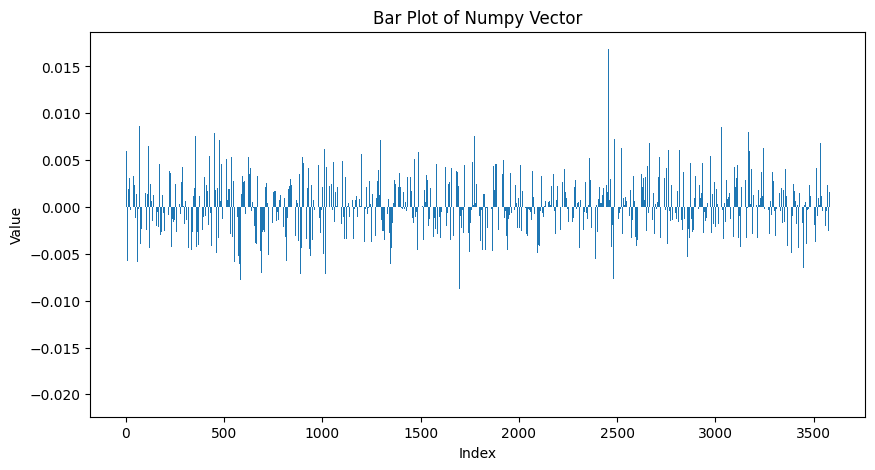

In [64]:
import matplotlib.pyplot as plt

# vector =loaded_data['predicted_embeds'][290]-loaded_data['true_embeds'][290]
vector = diff*0.2
# vector =loaded_data['true_embeds'][290]
# vector =predicted_embed-true_embed

plt.figure(figsize=(10, 5))
# 创建bar图
plt.bar(range(len(vector)), vector)

# 添加标签和标题
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Bar Plot of Numpy Vector')

# 显示图形
plt.show()

In [23]:
vector.

np.float32(0.0)

In [4]:
#region 已经训练过一个模型从EEG latent预测embedding，读取所有的（character，训练embed）
root_dir = 'Data/qwen-characterSplit'
sub=[8] # ! Mask

characters=[]
for sub_dir in os.listdir(root_dir):
    if all(item not in sub_dir for item in map(str, sub)):
        continue
    else:
    # if "08" in sub_dir:
    # if "04" in sub_dir or "05" in sub_dir or "08" in sub_dir or True:
        sub_dir_path = os.path.join(root_dir, sub_dir)
        if os.path.isdir(sub_dir_path):
            for file_name in os.listdir(sub_dir_path):
                if file_name.endswith('.pkl') and 'latent' in file_name and '_tokenid'  in file_name and'_tokenEmbedding' in file_name:
                    file_path = os.path.join(sub_dir_path, file_name)
                    with open(file_path, 'rb') as file:
                        loaded_data = pickle.load(file)
                    # 如果loaded_data里面每一个元素没有下面那么多成分，以每个的shape为准，shape总是对的。比如没有一个3584长度的东西说明embedding没在里面
                    for  eeg, character, latent, tokenid, embed in loaded_data:
                        # eeg.shape (1, 128, 256) 多通道EEG信号
                        # character -> str 一个中文汉字
                        # latent.shape (1, 64) EEG压缩后的向量
                        # tokenid array([24]) 汉字对应的token
                        # embed.shape (3584,)  词嵌入向量
                        characters.append([character,embed])
                       
print(f"预测样本数量：{len(characters)}")
#endregion

预测样本数量：22324


In [9]:
p=print
from collections import Counter


# Flatten the list and count the frequencies
flattened_list = [ch[0] for ch in characters]
frequency = Counter(flattened_list)

# Get the 10 most common elements
# Get the 10 most common elements
top_10_elements = frequency.most_common(10)
p(top_10_elements)
# Get the indices of each element in the list
element_indices = {element: [i for i, x in enumerate(flattened_list) if x == element] for element in frequency}
element_indices['我'][:10]

[('的', 739), ('我', 697), ('一', 522), ('是', 477), ('…', 425), ('他', 416), ('了', 414), ('说', 352), ('这', 344), ('不', 342)]


[12, 17, 20, 75, 127, 176, 210, 244, 318, 351]

In [34]:
element_indices['我'][:10]

[1, 134, 290, 306, 356, 367, 390, 411, 422, 443]

In [13]:
eegEmbedingFile="Data/yhw/mask8/latentEmbedding_predictions.pkl" # ! Data
with open(eegEmbedingFile, 'rb') as file:
    loaded_data = pickle.load(file)
    
len(loaded_data['predicted_embeds'])


22324

In [136]:
a=((loaded_data['predicted_embeds'][0]-loaded_data['true_embeds'][0])** 2)
a

array([2.3497836e-05, 1.4102574e-07, 1.4761622e-05, ..., 2.4764599e-06,
       5.8279000e-04, 7.0248039e-05], dtype=float32)

In [105]:
for p, gt in zip (loaded_data['predicted_embeds'],loaded_data['true_embeds']):
    print(euclidean_distance(p,gt))

tensor(0.8603)
tensor(0.9159)
tensor(0.9465)
tensor(0.9378)
tensor(0.9500)
tensor(0.9339)
tensor(0.9334)
tensor(0.9656)
tensor(0.9769)
tensor(0.9579)
tensor(0.9677)
tensor(0.9449)
tensor(0.9903)
tensor(0.9897)
tensor(0.9610)
tensor(0.9600)
tensor(0.9619)
tensor(0.9705)
tensor(0.9602)
tensor(0.9709)
tensor(0.9641)
tensor(0.9486)
tensor(0.9489)
tensor(0.9586)
tensor(0.9648)
tensor(0.9326)
tensor(0.9488)
tensor(0.9663)
tensor(0.9693)
tensor(0.9693)
tensor(0.9749)
tensor(0.9574)
tensor(0.9660)
tensor(0.9654)
tensor(0.9420)
tensor(0.9726)
tensor(0.9413)
tensor(0.9377)
tensor(0.9522)
tensor(0.9495)
tensor(0.9617)
tensor(0.9806)
tensor(0.9867)
tensor(0.9429)
tensor(0.9705)
tensor(0.9935)
tensor(0.9678)
tensor(0.9744)
tensor(0.9479)
tensor(0.9439)
tensor(0.9648)
tensor(0.9498)
tensor(0.9627)
tensor(0.9643)
tensor(0.9660)
tensor(0.9636)
tensor(0.9629)
tensor(0.9731)
tensor(0.9237)
tensor(1.0402)
tensor(1.0312)
tensor(1.0276)
tensor(0.9845)
tensor(1.0087)
tensor(1.0133)
tensor(1.0130)
tensor(0.9

In [ ]:
sysprompt="You are a helpful assistant. 用户向你诉说了一些话语，但是你没有听得特别清楚。不需要考虑用户说的话的语义，尝试忠实地复述用户的话。回答只需要包含用户的话，不要有其他的内容。"

for idx,(ch, _) in enumerate(tqdm(characters, desc="Processing characters")):
    gt_embed=loaded_data['predicted_embeds'][idx]
    gt_embed = torch.tensor(gt_embed)
    if gt_embed.shape[0] == 3584:
        gt_embed = gt_embed.unsqueeze(0)
    insert_message = gt_embed.unsqueeze(0).to(torch.bfloat16).to(device)
    
    batched_input_embeds = torch.cat([
                getEmbedding(f'<|im_start|>system\n{sysprompt}<|im_end|>\n<|im_start|>user\n', raw=True).repeat(batch_size, 1, 1),
                torch.cat(batch_gt_embeds, dim=0),
                getEmbedding('<|im_end|>\n<|im_start|>assistant\n', raw=True).repeat(batch_size, 1, 1)
        ], dim=1)

In [29]:
import numpy as np


# senEmbedding= np.array([ch[1] for ch in characters[23:25]])
senEmbedding=loaded_data['predicted_embeds'][23:25]

gt_embed = torch.tensor(senEmbedding)

insert_message = gt_embed.unsqueeze(0).to(torch.bfloat16).to(device)
batched_input_embeds = torch.cat([
                getEmbedding(f'<|im_start|>system\n{sysprompt}<|im_end|>\n<|im_start|>user\n', raw=True),
                insert_message,
                getEmbedding('<|im_end|>\n<|im_start|>assistant\n', raw=True)
        ], dim=1)
predicted_ids = model.generate(
                inputs_embeds=batched_input_embeds,
                max_new_tokens=512,
                do_sample=True
            )

responses = tokenizer.batch_decode(predicted_ids, skip_special_tokens=True)
print(responses)

['编辑']


In [137]:

# 输出文件名
# output_file = "responses-sub04_sub05_sub08.txt"
subprefix='_'.join([ f"sub{mask:02}" for mask in sub])
output_file = f"responses-{subprefix}.txt"

# sysprompt="You are a helpful assistant. 用户向你诉说了一些话语，但是你没有听得特别清楚。不需要考虑用户说的话的语义，尝试忠实地复述用户的话。回答只需要包含用户的话，不要有其他的内容。"
sysprompt="You are a helpful assistant. 用户向你诉说了一个字。不需要考虑用户说的话的语义，尝试忠实地复述用户的话。回答只需要包含用户的话，不要有其他的内容。"
# 一个字一个字重建


jumpTo=0
batch_size = 150  # 设置批量大小
batch_characters = []  # 用于存储当前批次的字符
batch_gt_embeds = []  # 用于存储当前批次的嵌入

with open(output_file, "w") as file:
    for idx,(ch, _) in enumerate(tqdm(characters, desc="Processing characters")):
        jumpTo -= 1
        if jumpTo > 0:
            continue

        gt_embed=loaded_data['predicted_embeds'][idx]
        gt_embed = torch.tensor(gt_embed)
        if gt_embed.shape[0] == 3584:
            gt_embed = gt_embed.unsqueeze(0)
        insert_message = gt_embed.unsqueeze(0).to(torch.bfloat16).to(device)

        # 将当前字符和嵌入加入批量
        batch_characters.append(ch)
        if insert_message.shape[1]!=1:
            insert_message = insert_message[:,0,:].unsqueeze(1)
        batch_gt_embeds.append(insert_message)

        # 如果达到批量大小，进行推理
        if len(batch_characters) == batch_size:
            # 构建批量输入
            batched_input_embeds = torch.cat([
                getEmbedding(f'<|im_start|>system\n{sysprompt}<|im_end|>\n<|im_start|>user\n', raw=True).repeat(batch_size, 1, 1),
                torch.cat(batch_gt_embeds, dim=0),
                getEmbedding('<|im_end|>\n<|im_start|>assistant\n', raw=True).repeat(batch_size, 1, 1)
            ], dim=1)

            # 使用模型生成结果
            predicted_ids = model.generate(
                inputs_embeds=batched_input_embeds,
                max_new_tokens=512,
                do_sample=True
            )

            # 解码并写入结果
            responses = tokenizer.batch_decode(predicted_ids, skip_special_tokens=True)
            for ch, response in zip(batch_characters, responses):
                file.write(f"{ch}: {response}\n")
                file.flush()  # 确保及时写入磁盘

            # 清空当前批量
            batch_characters = []
            batch_gt_embeds = []

    # 处理最后一批未完成的样本
    if batch_characters:
        batched_input_embeds = torch.cat([
            getEmbedding(f'<|im_start|>system\n{sysprompt}<|im_end|>\n<|im_start|>user\n', raw=True).repeat(len(batch_characters), 1, 1),
            torch.cat(batch_gt_embeds, dim=0),
            getEmbedding('<|im_end|>\n<|im_start|>assistant\n', raw=True).repeat(len(batch_characters), 1, 1)
        ], dim=1)

        predicted_ids = model.generate(
            inputs_embeds=batched_input_embeds,
            max_new_tokens=512,
            do_sample=True
        )

        responses = tokenizer.batch_decode(predicted_ids, skip_special_tokens=True)
        for ch, response in zip(batch_characters, responses):
            file.write(f"{ch}: {response}\n")
            file.flush()

print("Processing completed. Responses saved to", output_file)


Processing characters:   0%|          | 0/22324 [00:00<?, ?it/s]

Processing characters:  11%|█         | 2399/22324 [00:59<08:10, 40.60it/s]


KeyboardInterrupt: 

## Evaluate

In [24]:
# 初始化统计指标
total_lines = 0
matching_count = 0
non_matching_count = 0

chs, responses=[],[]
# 打开文件并逐行读取
with open(output_file, "r") as file:
    for line in file:
        # 去掉每行的首尾空格并分割 'ch' 和 'response'
        parts = line.strip().split(": ")
        
        # 确保格式正确
        if len(parts) == 2:
            ch, response = parts
            chs.append(ch)
            total_lines += 1
            
            # 比较 ch 和 response
            if ch == response:
                matching_count += 1
                responses.append(response)
            else:
                non_matching_count += 1
                responses.append("？")

# 计算统计指标
match_percentage = (matching_count / total_lines) * 100 if total_lines > 0 else 0
non_match_percentage = (non_matching_count / total_lines) * 100 if total_lines > 0 else 0


# print("".join(chs))
# print("="*20)
# print("".join(responses))
# 输出统计结果
print(f"Total lines: {total_lines}")
print(f"Matching count: {matching_count}")
print(f"Non-matching count: {non_matching_count}")
print(f"Matching percentage: {match_percentage:.2f}%")
print(f"Non-matching percentage: {non_match_percentage:.2f}%")


Total lines: 44648
Matching count: 44233
Non-matching count: 415
Matching percentage: 99.07%
Non-matching percentage: 0.93%


sub 08

Total lines: 22324
Matching count: 22108
Non-matching count: 216
Matching percentage: 99.03%
Non-matching percentage: 0.97%

sub06_sub08

Total lines: 44648
Matching count: 44233
Non-matching count: 415
Matching percentage: 99.07%
Non-matching percentage: 0.93%

sub04_sub05_sub07
